<a href="https://colab.research.google.com/github/Melisa7L/FIA2023-TPI/blob/main/FIA2023_TPI_Lino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Crear un repositorio llamado FIA2023-TPI**

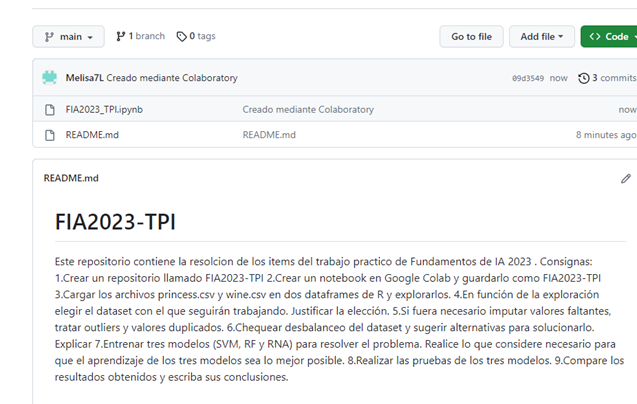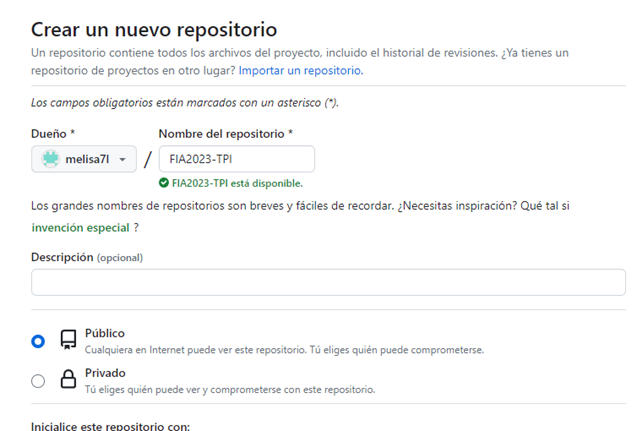

**2.Crear un notebook en Google Colab y guardarlo como FIA2023-TPI**
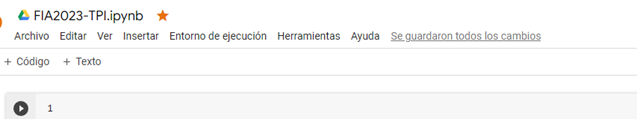

**3.Cargar los archivos princess.csv y wine.csv en dos dataframes de R y explorarlos.**

librerias

In [1]:
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('ggplot2')
install.packages('gridExtra')
install.packages('lubridate')#para trabajar con fechas
install.packages('ggplot2')#Para graficos
install.packages('ggdist')#Para graficos (histogramas)
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘distributional’, ‘numDeriv’, ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



importamos las librerias

In [2]:
library('neuralnet')
library('NeuralNetTools')
library('ggplot2')
library('gridExtra')
library('lubridate')
library('ggdist')
library('dplyr')
library('randomForest')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:neuralnet’:

    compute


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
# cargo los archivos princess.csv y wine.csv en dos dataframes
df_princess <- read.csv("/content/princess.csv")
df_wine <- read.csv("/content/wine.csv")
#Exploramos los datos
head(df_princess) # muestra las primeras filas del dataset princess
head(df_wine) # muestra las primeras filas del dataset wine

,Phoenix.Feather,Unicorn.Horn,Dragon.s.Blood,Mermaid.Tears,Fairy.Dust,Goblin.Toes,Witch.s.Brew,Griffin.Claw,Troll.Hair,Kraken.Ink,Minotaur.Horn,Basilisk.Scale,Chimera.Fang,Cured
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
2,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
3,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
4,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
5,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
6,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,bad
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,bad
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,bad
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,bad


In [4]:
summary(df_princess) # muestra un resumen con las estadísticas de cada columna de princess

 Phoenix.Feather  Unicorn.Horn   Dragon.s.Blood  Mermaid.Tears  
 Min.   : 1.00   Min.   : 1.00   Min.   : 1.00   Min.   : 1.00  
 1st Qu.: 8.50   1st Qu.: 5.30   1st Qu.: 9.60   1st Qu.: 7.60  
 Median :14.70   Median : 9.50   Median :15.80   Median :13.10  
 Mean   :15.37   Mean   :10.95   Mean   :16.12   Mean   :13.63  
 3rd Qu.:21.30   3rd Qu.:15.57   3rd Qu.:22.00   3rd Qu.:19.00  
 Max.   :42.10   Max.   :34.10   Max.   :40.80   Max.   :35.80  
   Fairy.Dust      Goblin.Toes     Witch.s.Brew     Griffin.Claw  
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 8.625   1st Qu.: 7.90   1st Qu.: 6.325   1st Qu.: 8.40  
 Median :14.500   Median :13.50   Median :11.200   Median :14.40  
 Mean   :15.069   Mean   :14.16   Mean   :12.329   Mean   :14.91  
 3rd Qu.:20.700   3rd Qu.:19.50   3rd Qu.:16.900   3rd Qu.:20.50  
 Max.   :40.400   Max.   :37.80   Max.   :37.300   Max.   :39.40  
   Troll.Hair      Kraken.Ink    Minotaur.Horn   Basilisk.Scale 
 Min.   : 1

In [5]:
summary(df_wine) # muestra un resumen con las estadísticas de cada columna de princess

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [6]:
str(df_princess) # muestra la estructura del dataset princess

'data.frame':	2338 obs. of  14 variables:
 $ Phoenix.Feather: num  2.4 2.1 17.2 8.4 22.1 21.9 30 16.4 28.4 11.8 ...
 $ Unicorn.Horn   : num  18.7 6 13.9 9.7 10.8 5.5 8.6 12.1 18.9 17.7 ...
 $ Dragon.s.Blood : num  18.4 15 23.8 6.8 16.4 11.5 29.1 14.2 30.3 8.8 ...
 $ Mermaid.Tears  : num  27.9 13.3 6.8 26.9 10.5 5 26 22 5.6 22.9 ...
 $ Fairy.Dust     : num  7.9 15.6 10.7 4.6 22 27.9 18.6 15.6 18 6.1 ...
 $ Goblin.Toes    : num  9.6 13.1 15.8 29.1 23.4 20.9 13.8 10.4 9.9 5.8 ...
 $ Witch.s.Brew   : num  18.3 11 19.4 14.6 2.6 20.5 3.8 11.7 6.2 15.7 ...
 $ Griffin.Claw   : num  13.2 5 2.7 19.7 18.2 22.7 19.1 18.4 24.4 2.6 ...
 $ Troll.Hair     : num  2.5 7.2 15.4 18 23.8 33.9 42.3 21 14.4 16.5 ...
 $ Kraken.Ink     : num  26 26 21.2 20.8 11.3 7.4 17.3 20.3 2.7 23.7 ...
 $ Minotaur.Horn  : num  10.5 1.5 11.1 13.6 5.5 3.6 16.8 4 15.1 25.2 ...
 $ Basilisk.Scale : num  26.2 13.3 16.6 13.9 16.8 38.4 16.3 15.7 41.6 1.7 ...
 $ Chimera.Fang   : num  12.5 6.2 11.4 8.1 16.2 5.2 4.5 15.3 7 1.1 ...
 $

In [7]:
str(df_wine) # muestra la estructura del dataset wine

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : chr  "bad" "bad" "bad" "good" ...


In [8]:
nrow(df_princess)  # muestra el número de filas en el data frame
ncol(df_princess)  # muestra el número de columnas en el data frame

[1] 2338

[1] 14

In [9]:
nrow(df_wine)  # muestra el número de filas en el data frame
ncol(df_wine)  # muestra el número de columnas en el data frame

[1] 1599

[1] 12

**4.En función de la exploración elegir el dataset con el que seguirán trabajando. Justificar la elección.**



En base a lo que observe de ambos dataset ,elijo trabajar con el de "princess" . Para elegirlo tuve en cuenta estos detalles:

*   El tema: me parecio interesante analizar datos sobre cosas de fantasia como unicornios,hadas,etc.
*   Cantidad de registros y columnas: tiene mas datos que el otro dataset y me va a servir para tener mas precision o mas detalle.
*   Valores: como son todos valores numericos va a ser mas comodo trabajar con lo algoritmos.




**5.Si fuera necesario imputar valores faltantes, tratar outliers y valores duplicados.**

In [10]:
# Vemos si hay campos nulos en alguna columna
colSums(is.na(df_princess))

Phoenix.Feather    Unicorn.Horn  Dragon.s.Blood   Mermaid.Tears      Fairy.Dust 
              0               0               0               0               0 
    Goblin.Toes    Witch.s.Brew    Griffin.Claw      Troll.Hair      Kraken.Ink 
              0               0               0               0               0 
  Minotaur.Horn  Basilisk.Scale    Chimera.Fang           Cured 
              0               0               0               0

no hay valores nulos

como no hay valores vacios no hace falta hacer mas

In [11]:
# Identificar las variables numéricas
num_var <- names(df_princess)[sapply(df_princess, is.numeric)]
# Imprimir las variables numéricas
print(num_var)

 [1] "Phoenix.Feather" "Unicorn.Horn"    "Dragon.s.Blood"  "Mermaid.Tears"  
 [5] "Fairy.Dust"      "Goblin.Toes"     "Witch.s.Brew"    "Griffin.Claw"   
 [9] "Troll.Hair"      "Kraken.Ink"      "Minotaur.Horn"   "Basilisk.Scale" 
[13] "Chimera.Fang"    "Cured"          


In [12]:
# Eliminar filas duplicadas
df_sin_duplicados <- unique(df_princess)

In [13]:
# Voy a traducir los nombres de las columnas

nuevos_nombres <- c(
  "Pluma.de.Fénix", "Cuerno.de.Unicornio", "Sangre.de.Dragón", "Lágrimas.de.Sirena",
  "Polvo.de.Hada", "Dedos.de.Goblin", "Cerveza.de.Bruja", "Garra.de.Grifo",
  "Cabello.de.Trol", "Tinta.de.Kraken", "Cuerno.de.Minotauro", "Escama.de.Basilisco",
  "Colmillo.de.Quimera", "Curado"
)

colnames(df_princess) <- nuevos_nombres

# Guardar el DataFrame con nombres de columna en español
write.csv(df_princess, file = '/content/princess.limpio.csv') # guadamos el dataset limpio

In [14]:
str(df_princess) # luego de la traduccion se ven asi las columnas

'data.frame':	2338 obs. of  14 variables:
 $ Pluma.de.Fénix     : num  2.4 2.1 17.2 8.4 22.1 21.9 30 16.4 28.4 11.8 ...
 $ Cuerno.de.Unicornio: num  18.7 6 13.9 9.7 10.8 5.5 8.6 12.1 18.9 17.7 ...
 $ Sangre.de.Dragón   : num  18.4 15 23.8 6.8 16.4 11.5 29.1 14.2 30.3 8.8 ...
 $ Lágrimas.de.Sirena : num  27.9 13.3 6.8 26.9 10.5 5 26 22 5.6 22.9 ...
 $ Polvo.de.Hada      : num  7.9 15.6 10.7 4.6 22 27.9 18.6 15.6 18 6.1 ...
 $ Dedos.de.Goblin    : num  9.6 13.1 15.8 29.1 23.4 20.9 13.8 10.4 9.9 5.8 ...
 $ Cerveza.de.Bruja   : num  18.3 11 19.4 14.6 2.6 20.5 3.8 11.7 6.2 15.7 ...
 $ Garra.de.Grifo     : num  13.2 5 2.7 19.7 18.2 22.7 19.1 18.4 24.4 2.6 ...
 $ Cabello.de.Trol    : num  2.5 7.2 15.4 18 23.8 33.9 42.3 21 14.4 16.5 ...
 $ Tinta.de.Kraken    : num  26 26 21.2 20.8 11.3 7.4 17.3 20.3 2.7 23.7 ...
 $ Cuerno.de.Minotauro: num  10.5 1.5 11.1 13.6 5.5 3.6 16.8 4 15.1 25.2 ...
 $ Escama.de.Basilisco: num  26.2 13.3 16.6 13.9 16.8 38.4 16.3 15.7 41.6 1.7 ...
 $ Colmillo.de.Quimera: n

**6.Chequear desbalanceo del dataset y sugerir alternativas para solucionarlo.Explicar**

No creo que sea necesario ver el desbalanceo ya que el dataset esta balanceado.

**7.Entrenar tres modelos (SVM, RF y RNA) para resolver el problema. Realice lo que considere necesario para que el aprendizaje de los tres modelos sea lo mejor posible.**

Librerias

In [15]:
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('ggplot2')
install.packages('gridExtra')
install.packages("randomForest")
install.packages('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [16]:
library('neuralnet')
library('NeuralNetTools')
library('ggplot2')
library('gridExtra')
library('e1071')
library('randomForest')

*El primer modelo que voy a trabajar es el* **Random Forest**

In [17]:
# Crear funciones
entrenar_evaluar_rf <- function(datos_entrenamiento, datos_prueba, semilla = NULL) {
  if (!is.null(semilla)) set.seed(semilla)

  # Convertir la variable de respuesta a factor si no lo es
  datos_entrenamiento$Curado <- as.factor(datos_entrenamiento$Curado)
  datos_prueba$Curado <- as.factor(datos_prueba$Curado)

  # Entrenar un modelo de Random Forest
  modelo_rf <- randomForest(Curado ~ ., data = datos_entrenamiento, ntree = 100)

  # Hacer predicciones en el conjunto de prueba
  predicciones <- predict(modelo_rf, datos_prueba)

  # Evaluar el rendimiento del modelo
  error_clasificacion <- sum(predicciones != datos_prueba$Curado) / length(datos_prueba$Curado)
  acierto <- 1 - error_clasificacion

  return(list(modelo = modelo_rf, predicciones = predicciones, acierto = acierto))
}

# Inicializar vectores y listas
AciertoRF <- numeric(100)
ErroresRF <- numeric(100)
ModelosRF <- list()
PrediccionRF <- list()

# Realizar 100 corridas
for (i in 1:100) {
  indices <- sample(1:nrow(df_princess), 0.7 * nrow(df_princess))
  diagonal_train <- df_princess[indices, ]
  diagonal_test <- df_princess[-indices, ]

  resultados <- entrenar_evaluar_rf(diagonal_train, diagonal_test, semilla = i)

  ErroresRF[i] <- 1 - resultados$acierto
  AciertoRF[i] <- resultados$acierto
  ModelosRF[[i]] <- resultados$modelo
  PrediccionRF[[i]] <- resultados$predicciones
}

In [18]:
head(diagonal_test)

,Pluma.de.Fénix,Cuerno.de.Unicornio,Sangre.de.Dragón,Lágrimas.de.Sirena,Polvo.de.Hada,Dedos.de.Goblin,Cerveza.de.Bruja,Garra.de.Grifo,Cabello.de.Trol,Tinta.de.Kraken,Cuerno.de.Minotauro,Escama.de.Basilisco,Colmillo.de.Quimera,Curado
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
7,30.0,8.6,29.1,26.0,18.6,13.8,3.8,19.1,42.3,17.3,16.8,16.3,4.5,1
22,15.8,3.2,15.6,5.2,16.0,20.0,12.6,16.6,8.6,10.9,25.7,17.5,6.4,0
25,10.1,11.6,15.2,16.1,24.1,15.4,25.2,29.0,15.5,10.1,8.9,22.1,21.1,1
27,6.3,10.9,12.5,21.9,20.8,6.3,18.9,17.9,4.2,19.4,3.4,15.8,13.9,0
34,11.9,9.9,23.7,11.7,11.6,8.6,23.9,1.8,11.3,22.7,3.2,24.1,8.2,1


In [19]:
head(diagonal_train)

,Pluma.de.Fénix,Cuerno.de.Unicornio,Sangre.de.Dragón,Lágrimas.de.Sirena,Polvo.de.Hada,Dedos.de.Goblin,Cerveza.de.Bruja,Garra.de.Grifo,Cabello.de.Trol,Tinta.de.Kraken,Cuerno.de.Minotauro,Escama.de.Basilisco,Colmillo.de.Quimera,Curado
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
916,23.7,1.6,26.4,2.3,2.6,8.7,16.1,10.5,21.7,9.1,1.0,20.9,2.6,1
1307,12.3,19.7,31.0,16.5,18.8,22.0,2.8,25.3,29.4,23.5,4.6,3.6,11.0,1
1931,10.4,18.8,12.9,5.2,30.6,26.2,19.1,29.4,22.8,2.8,8.7,17.3,16.9,1
2203,3.7,5.7,9.0,3.3,17.4,33.3,7.6,20.1,11.5,6.1,5.2,6.1,1.9,0
718,22.6,4.1,6.1,2.3,15.7,7.6,8.7,6.3,24.6,12.6,10.8,30.1,3.7,1
838,18.3,4.1,34.3,12.3,7.5,8.6,5.2,10.7,18.0,33.9,22.9,11.8,4.1,1


*Resultados de la prediccion*

In [20]:
AciertoRF

[1] 0.9245014 0.9202279 0.9230769 0.9145299 0.9116809 0.9287749 0.9230769
  [8] 0.9045584 0.9002849 0.9330484 0.9074074 0.9230769 0.9088319 0.9074074
 [15] 0.9316239 0.9188034 0.9245014 0.9415954 0.9287749 0.9444444 0.9102564
 [22] 0.9188034 0.9159544 0.9259259 0.9188034 0.8988604 0.9373219 0.9188034
 [29] 0.9173789 0.9159544 0.9401709 0.9074074 0.9074074 0.9259259 0.9301994
 [36] 0.9074074 0.9145299 0.9301994 0.9330484 0.9045584 0.9202279 0.9145299
 [43] 0.8945869 0.9230769 0.9102564 0.9102564 0.9102564 0.9316239 0.9301994
 [50] 0.9159544 0.9430199 0.9159544 0.9430199 0.9188034 0.9059829 0.9301994
 [57] 0.9102564 0.9202279 0.9245014 0.9301994 0.9373219 0.9145299 0.9273504
 [64] 0.9045584 0.9216524 0.9259259 0.9145299 0.9216524 0.9145299 0.9216524
 [71] 0.9245014 0.9330484 0.9287749 0.9287749 0.9358974 0.9273504 0.9415954
 [78] 0.9344729 0.9373219 0.9202279 0.9373219 0.9145299 0.9059829 0.9188034
 [85] 0.9216524 0.9230769 0.9188034 0.9344729 0.9245014 0.9259259 0.9131054
 [92] 0.9287749 0.9145299 0.9287749 0.9188034 0.9202279 0.9330484 0.9387464
 [99] 0.9259259 0.9216524

In [21]:
mean(AciertoRF)

[1] 0.9218661

In [22]:
ErroresRF

[1] 0.07549858 0.07977208 0.07692308 0.08547009 0.08831909 0.07122507
  [7] 0.07692308 0.09544160 0.09971510 0.06695157 0.09259259 0.07692308
 [13] 0.09116809 0.09259259 0.06837607 0.08119658 0.07549858 0.05840456
 [19] 0.07122507 0.05555556 0.08974359 0.08119658 0.08404558 0.07407407
 [25] 0.08119658 0.10113960 0.06267806 0.08119658 0.08262108 0.08404558
 [31] 0.05982906 0.09259259 0.09259259 0.07407407 0.06980057 0.09259259
 [37] 0.08547009 0.06980057 0.06695157 0.09544160 0.07977208 0.08547009
 [43] 0.10541311 0.07692308 0.08974359 0.08974359 0.08974359 0.06837607
 [49] 0.06980057 0.08404558 0.05698006 0.08404558 0.05698006 0.08119658
 [55] 0.09401709 0.06980057 0.08974359 0.07977208 0.07549858 0.06980057
 [61] 0.06267806 0.08547009 0.07264957 0.09544160 0.07834758 0.07407407
 [67] 0.08547009 0.07834758 0.08547009 0.07834758 0.07549858 0.06695157
 [73] 0.07122507 0.07122507 0.06410256 0.07264957 0.05840456 0.06552707
 [79] 0.06267806 0.07977208 0.06267806 0.08547009 0.09401709 0.08119658
 [85] 0.07834758 0.07692308 0.08119658 0.06552707 0.07549858 0.07407407
 [91] 0.08689459 0.07122507 0.08547009 0.07122507 0.08119658 0.07977208
 [97] 0.06695157 0.06125356 0.07407407 0.07834758

In [23]:
mean(ErroresRF)

[1] 0.0781339

*El segundo metodo que voy a hacer es el* **SVM**

In [24]:
# Se inicia para almacenar resultados
AciertoSVM <- numeric(100)
ErroresSVM <- numeric(100)
ModelosSVM <- list()
PrediccionSVM <- list()

# Realizamos 100 corridas
for (i in 1:100) {

  # Dividimos los datos en conjuntos de entrenamiento y prueba
  set.seed(i)  # Cambia la semilla en cada iteración para obtener diferentes conjuntos de entrenamiento y prueba
  indices <- sample(1:nrow(df_princess), 0.7 * nrow(df_princess))
  diagonal_train <- df_princess[indices, ]
  diagonal_test <- df_princess[-indices, ]

  # Convertimos la variable de respuesta a factor si no lo es
  diagonal_train$Curado <- as.factor(diagonal_train$Curado)
  diagonal_test$Curado <- as.factor(diagonal_test$Curado)

  # Entrenamos un modelo SVM
  ModelosSVM[[i]] <- svm(Curado ~ ., data = diagonal_train, type = "C")
  PrediccionSVM[[i]] <- predict(ModelosSVM[[i]], newdata = diagonal_test)

  # Evaluamos el rendimiento del modelo
  ErroresSVM[i] <- sum(PrediccionSVM[[i]] != diagonal_test$Curado) / length(diagonal_test$Curado)
  AciertoSVM[i] <- 1 - ErroresSVM[i]
}

# Guardamos resultados
save(AciertoSVM, ErroresSVM, ModelosSVM, PrediccionSVM, file = "resultados_svm.Rdata")


In [25]:
head(diagonal_test)

,Pluma.de.Fénix,Cuerno.de.Unicornio,Sangre.de.Dragón,Lágrimas.de.Sirena,Polvo.de.Hada,Dedos.de.Goblin,Cerveza.de.Bruja,Garra.de.Grifo,Cabello.de.Trol,Tinta.de.Kraken,Cuerno.de.Minotauro,Escama.de.Basilisco,Colmillo.de.Quimera,Curado
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8,16.4,12.1,14.2,22.0,15.6,10.4,11.7,18.4,21.0,20.3,4.0,15.7,15.3,0
9,28.4,18.9,30.3,5.6,18.0,9.9,6.2,24.4,14.4,2.7,15.1,41.6,7.0,0
10,11.8,17.7,8.8,22.9,6.1,5.8,15.7,2.6,16.5,23.7,25.2,1.7,1.1,1
19,19.1,12.2,19.6,22.6,30.7,3.3,36.1,14.7,14.3,25.9,9.9,20.7,14.2,1
22,15.8,3.2,15.6,5.2,16.0,20.0,12.6,16.6,8.6,10.9,25.7,17.5,6.4,0
27,6.3,10.9,12.5,21.9,20.8,6.3,18.9,17.9,4.2,19.4,3.4,15.8,13.9,0


In [26]:
head(diagonal_train)

,Pluma.de.Fénix,Cuerno.de.Unicornio,Sangre.de.Dragón,Lágrimas.de.Sirena,Polvo.de.Hada,Dedos.de.Goblin,Cerveza.de.Bruja,Garra.de.Grifo,Cabello.de.Trol,Tinta.de.Kraken,Cuerno.de.Minotauro,Escama.de.Basilisco,Colmillo.de.Quimera,Curado
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
503,19.8,17.5,14.0,10.8,30.5,14.7,13.8,36.7,15.7,5.7,9.7,4.1,1.8,1
2035,6.4,8.4,7.6,24.0,11.1,8.2,19.2,22.7,7.3,21.6,12.5,28.0,14.3,0
470,16.3,5.6,25.8,12.9,13.8,5.0,7.8,19.9,11.2,13.5,20.0,27.4,19.0,0
1990,26.7,6.2,18.1,5.8,12.4,5.4,1.7,15.4,26.1,30.8,17.2,12.3,35.8,1
1540,5.5,21.9,21.0,13.0,7.2,10.4,2.3,14.8,2.1,18.4,9.9,8.4,25.6,0
823,15.7,8.1,7.0,13.2,24.4,19.4,19.5,17.7,15.1,15.0,13.0,7.4,30.6,1


In [27]:
AciertoSVM

[1] 0.9444444 0.9515670 0.9458689 0.9472934 0.9515670 0.9487179 0.9558405
  [8] 0.9615385 0.9444444 0.9686610 0.9472934 0.9487179 0.9487179 0.9558405
 [15] 0.9544160 0.9572650 0.9558405 0.9615385 0.9487179 0.9601140 0.9444444
 [22] 0.9558405 0.9358974 0.9529915 0.9515670 0.9501425 0.9544160 0.9358974
 [29] 0.9515670 0.9558405 0.9529915 0.9515670 0.9501425 0.9586895 0.9373219
 [36] 0.9572650 0.9558405 0.9643875 0.9544160 0.9601140 0.9444444 0.9529915
 [43] 0.9515670 0.9586895 0.9558405 0.9558405 0.9558405 0.9601140 0.9501425
 [50] 0.9601140 0.9515670 0.9586895 0.9672365 0.9658120 0.9629630 0.9572650
 [57] 0.9529915 0.9601140 0.9544160 0.9544160 0.9458689 0.9458689 0.9544160
 [64] 0.9643875 0.9487179 0.9544160 0.9472934 0.9700855 0.9358974 0.9515670
 [71] 0.9529915 0.9458689 0.9387464 0.9487179 0.9586895 0.9615385 0.9629630
 [78] 0.9558405 0.9415954 0.9629630 0.9629630 0.9472934 0.9458689 0.9558405
 [85] 0.9572650 0.9544160 0.9501425 0.9672365 0.9515670 0.9515670 0.9572650
 [92] 0.9558405 0.9415954 0.9487179 0.9501425 0.9458689 0.9586895 0.9586895
 [99] 0.9529915 0.9472934

In [28]:
mean(AciertoSVM)

[1] 0.9533048

In [29]:
ErroresSVM

[1] 0.05555556 0.04843305 0.05413105 0.05270655 0.04843305 0.05128205
  [7] 0.04415954 0.03846154 0.05555556 0.03133903 0.05270655 0.05128205
 [13] 0.05128205 0.04415954 0.04558405 0.04273504 0.04415954 0.03846154
 [19] 0.05128205 0.03988604 0.05555556 0.04415954 0.06410256 0.04700855
 [25] 0.04843305 0.04985755 0.04558405 0.06410256 0.04843305 0.04415954
 [31] 0.04700855 0.04843305 0.04985755 0.04131054 0.06267806 0.04273504
 [37] 0.04415954 0.03561254 0.04558405 0.03988604 0.05555556 0.04700855
 [43] 0.04843305 0.04131054 0.04415954 0.04415954 0.04415954 0.03988604
 [49] 0.04985755 0.03988604 0.04843305 0.04131054 0.03276353 0.03418803
 [55] 0.03703704 0.04273504 0.04700855 0.03988604 0.04558405 0.04558405
 [61] 0.05413105 0.05413105 0.04558405 0.03561254 0.05128205 0.04558405
 [67] 0.05270655 0.02991453 0.06410256 0.04843305 0.04700855 0.05413105
 [73] 0.06125356 0.05128205 0.04131054 0.03846154 0.03703704 0.04415954
 [79] 0.05840456 0.03703704 0.03703704 0.05270655 0.05413105 0.04415954
 [85] 0.04273504 0.04558405 0.04985755 0.03276353 0.04843305 0.04843305
 [91] 0.04273504 0.04415954 0.05840456 0.05128205 0.04985755 0.05413105
 [97] 0.04131054 0.04131054 0.04700855 0.05270655

In [30]:
mean(ErroresSVM)

[1] 0.04669516

*El tercer metodo es el de* **Redes neuronales**

In [31]:
# Instalar las bibliotecas necesarias
install.packages('neuralnet')
install.packages('NeuralNetTools')
install.packages('ggplot2')
install.packages('gridExtra')

# Cargar bibliotecas
library(neuralnet)
library(NeuralNetTools)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
install.packages("neuralnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Creacion e implementacion de las redes neuronales

In [ ]:
# Número de nodos máximo: 5 a menos
num_nodos_oculta <- min(5, ncol(df_princess) - 1)

# Inicializamos vectores para almacenar resultados
AciertoRNA <- numeric(5)
ErroresRNA <- numeric(5)
ModelosRNA <- list()
PrediccionRNA <- list()

# Realizamos 5 repeticiones
for (i in 1:10) {
  # Entrenar la red neuronal
  set.seed(123)  # Fijar semilla para reproducibilidad
  red <- neuralnet(
    Curado ~ .,
    df_princess,
    hidden = c(num_nodos_oculta),
    linear.output = FALSE,
    act.fct = "logistic",
    algorithm = "backprop",
    threshold = 0.01,
    learningrate = 0.01,  # Puedes ajustar este valor
    rep = 1,  # Solo una repetición
    lifesign = "none"  # No mostrar información durante el entrenamiento
  )

  # Verificar convergencia
  if (is.null(red$net.result)) {
    warning(paste("La red neuronal no ha convergido en la repetición", i))
    next
  }

  # Guardar el modelo si es necesario
  ModelosRNA[[i]] <- red
}


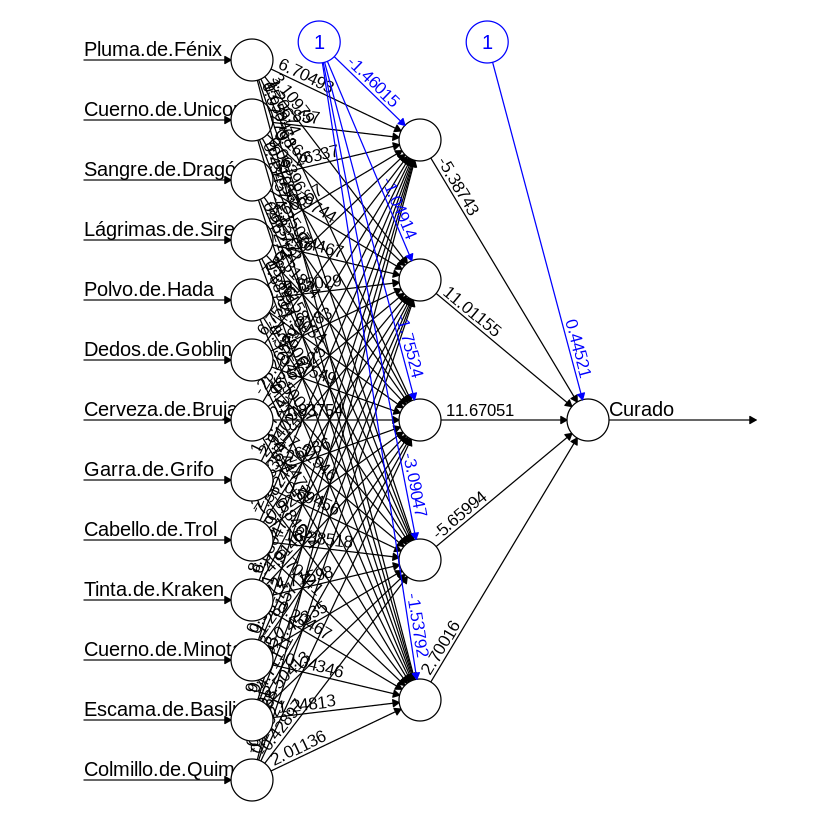

In [56]:
plot(red,rep="best")

In [58]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice



Predicciones y calculo del error

In [ ]:

# Hacer predicciones
columnas_prediccion <- c("X1test", "X2test")
pred <- predict(red, newdata = dataset_test[, columnas_prediccion])
predicciones_RNA <- as.numeric(round(pred))
# Calcular el error
ErrorC_RNA <- sum(predicciones_RNA != dataset_test$clase_test) / length(dataset_test$clase_test)
print("El error es:")
print(ErrorC_RNA)



[1] "El error es:"
[1] 0.1666667


Grafico para el conjunto de pruebas

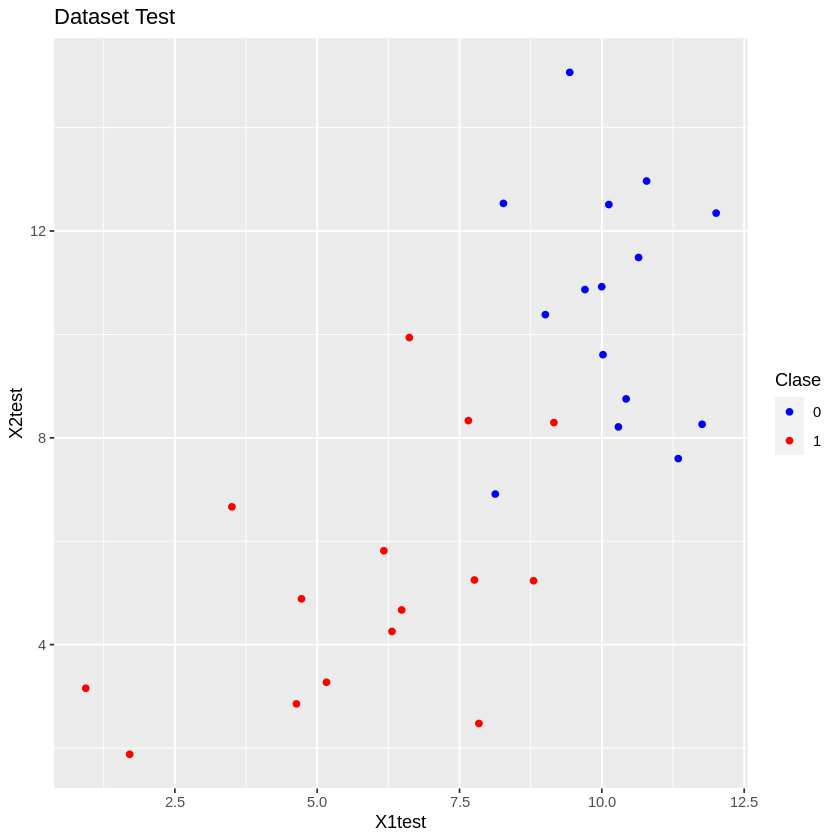

In [ ]:
# Gráfico para el conjunto de datos de prueba
plot_dataset_test <- ggplot(data = dataset_test, aes(x = X1test, y = X2test, color = as.factor(clase_test))) +
  geom_point() +
  labs(title = "Dataset Test", x = "X1test", y = "X2test") +  # Ajuste de los nombres de las columnas
  scale_color_manual(values = c("blue", "red"), name = 'Clase')

# Mostrar el gráfico
print(plot_dataset_test)


Grafico para las predicciones

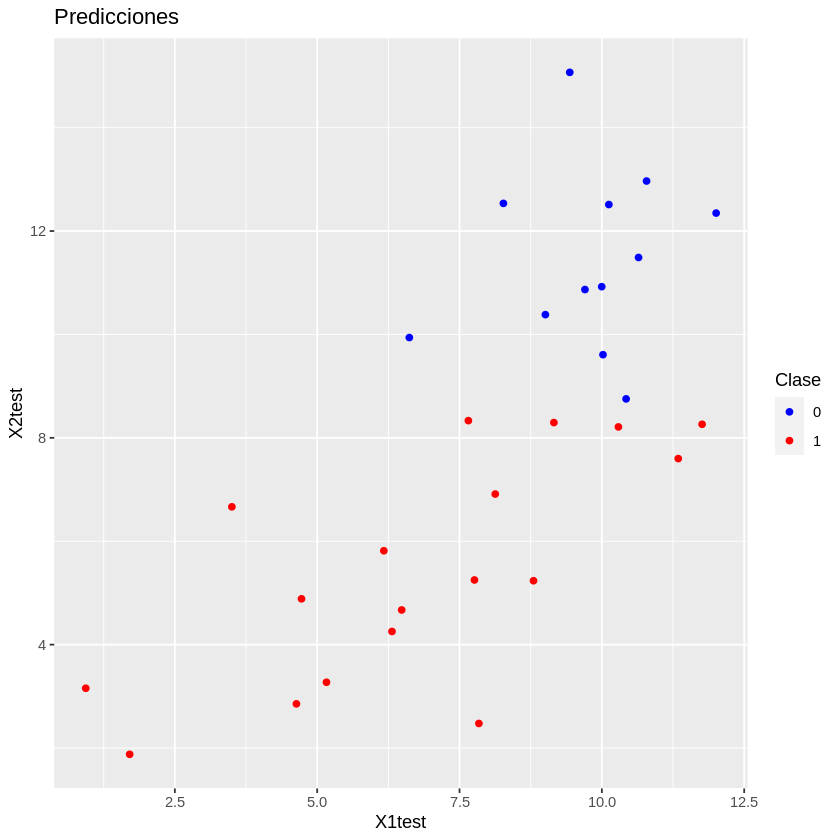

In [ ]:
# Crear un conjunto de datos para el gráfico de predicciones
predicciones_df <- as.data.frame(cbind(dataset_test[, c("X1test", "X2test")], predicciones_RNA))
names(predicciones_df) <- c("X1test", "X2test", "predicciones_RNA")

# Gráfico para las predicciones
plot_predictions <- ggplot(data = predicciones_df,
                           aes(x = X1test, y = X2test, color = as.factor(predicciones_RNA))) +
  geom_point() +
  labs(title = "Predicciones", x = "X1test", y = "X2test") +
  scale_color_manual(values = c("blue", "red"), name = 'Clase')

# Mostrar el gráfico
print(plot_predictions)


**8.Realizar las pruebas de los tres modelos.**

Pruebas para Random Forest (RF):

In [ ]:
# Inicializar vectores y listas
AciertoRF <- numeric(100)
ErroresRF <- numeric(100)
PrediccionRF <- list()

# Inicializar variables para métricas
precision_RF <- numeric(100)
sensibilidad_RF <- numeric(100)
especificidad_RF <- numeric(100)
f1_score_RF <- numeric(100)
exactitud_RF <- numeric(100)
fpr_RF <- numeric(100)

# Realizar 100 corridas
for (i in 1:100) {
  indices_test <- sample(1:nrow(df_princess), 0.3 * nrow(df_princess))
  diagonal_test <- df_princess[indices_test, ]

  # Utilizar la función entrenar_evaluar_rf para hacer las pruebas
  resultados <- entrenar_evaluar_rf(diagonal_train, diagonal_test, semilla = i)

  ErroresRF[i] <- 1 - resultados$acierto
  AciertoRF[i] <- resultados$acierto
  PrediccionRF[[i]] <- resultados$predicciones

  # Calcular la matriz de confusión
  matriz_confusion_RF <- table(diagonal_test$Curado, resultados$predicciones)

  # Calcular métricas
  precision_RF[i] <- (matriz_confusion_RF[1, 1]) / sum(matriz_confusion_RF[, 1])
  sensibilidad_RF[i] <- (matriz_confusion_RF[2, 2]) / sum(matriz_confusion_RF[2, ])
  especificidad_RF[i] <- (matriz_confusion_RF[1, 1]) / sum(matriz_confusion_RF[1, ])
  f1_score_RF[i] <- 2 * (precision_RF[i] * sensibilidad_RF[i]) / (precision_RF[i] + sensibilidad_RF[i])
  exactitud_RF[i] <- sum(diagonal_test$Curado == resultados$predicciones) / length(resultados$predicciones)
  fpr_RF[i] <- (matriz_confusion_RF[1, 2]) / sum(matriz_confusion_RF[, 2])
}

# Calcula promedio de métricas
precision_media_RF <- mean(precision_RF)
sensibilidad_media_RF <- mean(sensibilidad_RF)
especificidad_media_RF <- mean(especificidad_RF)
f1_score_media_RF <- mean(f1_score_RF)
exactitud_media_RF <- mean(exactitud_RF)
fpr_media_RF <- mean(fpr_RF)

# Imprimir resultados
print(paste("Precision Media de Random Forest:", precision_media_RF))
print(paste("Sensibilidad Media de Random Forest:", sensibilidad_media_RF))
print(paste("Especificidad Media de Random Forest:", especificidad_media_RF))
print(paste("F1-Score Media de Random Forest:", f1_score_media_RF))
print(paste("Exactitud Media de Random Forest:", exactitud_media_RF))
print(paste("False Positive Rate (FPR) Media de Random Forest:", fpr_media_RF))


[1] "Precision Media de Random Forest: 0.981618714884257"
[1] "Sensibilidad Media de Random Forest: 0.98156458706914"
[1] "Especificidad Media de Random Forest: 0.966239935890381"
[1] "F1-Score Media de Random Forest: 0.981591344529116"
[1] "Exactitud Media de Random Forest: 0.973851640513552"
[1] "False Positive Rate (FPR) Media de Random Forest: 0.0337797226230852"


Pruebas para Support Vector Machine (SVM):

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’




In [ ]:
library(caret)

Loading required package: lattice



In [ ]:
# Inicializar vectores y listas
AciertoSVM <- numeric(100)
ErroresSVM <- numeric(100)
PrediccionSVM <- list()

# Inicializar variables para métricas
precision_SVM <- numeric(100)
sensibilidad_SVM <- numeric(100)
especificidad_SVM <- numeric(100)
f1_score_SVM <- numeric(100)
exactitud_SVM <- numeric(100)

# Realizar 100 corridas
for (i in 1:100) {
  indices_test <- sample(1:nrow(df_princess), 0.3 * nrow(df_princess))
  diagonal_test <- df_princess[indices_test, ]

  # Utilizar el modelo SVM entrenado para hacer predicciones
  predicciones_svm <- predict(ModelosSVM[[i]], newdata = diagonal_test)

  PrediccionSVM[[i]] <- predicciones_svm

  # Calcular la matriz de confusión
  matriz_confusion_SVM <- table(diagonal_test$Curado, predicciones_svm)

  # Calcular métricas
  precision_SVM[i] <- matriz_confusion_SVM[2, 2] / sum(matriz_confusion_SVM[, 2])
  sensibilidad_SVM[i] <- matriz_confusion_SVM[2, 2] / sum(matriz_confusion_SVM[2, ])
  especificidad_SVM[i] <- matriz_confusion_SVM[1, 1] / sum(matriz_confusion_SVM[1, ])
  f1_score_SVM[i] <- 2 * (precision_SVM[i] * sensibilidad_SVM[i]) / (precision_SVM[i] + sensibilidad_SVM[i])
  exactitud_SVM[i] <- sum(diagonal_test$Curado == predicciones_svm) / length(predicciones_svm)
}

# Calcula promedio de métricas
precision_media_SVM <- mean(precision_SVM)
sensibilidad_media_SVM <- mean(sensibilidad_SVM)
especificidad_media_SVM <- mean(especificidad_SVM)
f1_score_media_SVM <- mean(f1_score_SVM)
exactitud_media_SVM <- mean(exactitud_SVM)

# Imprimir resultados
print(paste("Precision Media de SVM:", precision_media_SVM))
print(paste("Sensibilidad Media de SVM:", sensibilidad_media_SVM))
print(paste("Especificidad Media de SVM:", especificidad_media_SVM))
print(paste("F1-Score Media de SVM:", f1_score_media_SVM))
print(paste("Exactitud Media de SVM:", exactitud_media_SVM))


[1] "Precision Media de SVM: 0.969786105958429"
[1] "Sensibilidad Media de SVM: 0.961823105884007"
[1] "Especificidad Media de SVM: 0.970334295960551"
[1] "F1-Score Media de SVM: 0.965747329714301"
[1] "Exactitud Media de SVM: 0.966148359486448"


Pruebas para Redes Neuronales (RNA):


In [60]:

# Inicializar vectores para almacenar resultados
AciertoRNA <- numeric(5)
ErroresRNA <- numeric(5)
ModelosRNA <- list()
PrediccionRNA <- list()

# Realizar 5 repeticiones
for (i in 1:10) {
  # Entrenar la red neuronal
  set.seed(123)  # Fijar semilla para reproducibilidad
  red <- neuralnet(
    Curado ~ .,
    df_princess,
    hidden = c(5),
    linear.output = FALSE,
    act.fct = "logistic",
    algorithm = "backprop",
    threshold = 0.01,
    learningrate = 0.01,
    rep = 1,
    lifesign = "none"
  )

  # Verificar convergencia
  if (is.null(red$net.result)) {
    warning(paste("La red neuronal no ha convergido en la repetición", i))
    next
  }

  # Realizar predicciones sobre el conjunto de prueba
  pred_bin <- ifelse(predict(red, df_princess[, -14]) > 0.5, 1, 0)

  # Calcular el error de clasificación
  ErroresRNA[i] <- sum(pred_bin != df_princess$Curado) / length(df_princess$Curado)
  AciertoRNA[i] <- 1 - ErroresRNA[i]

  # Guardar el modelo y predicciones si es necesario
  ModelosRNA[[i]] <- red
  PrediccionRNA[[i]] <- pred_bin
}

# Calcular métricas de evaluación
confusion_matrices <- lapply(PrediccionRNA, function(pred) confusionMatrix(table(pred, df_princess$Curado)))
precisions <- sapply(confusion_matrices, function(cm) cm$byClass["Pos Pred Value"])
sensitivities <- sapply(confusion_matrices, function(cm) cm$byClass["Sensitivity"])
specificities <- sapply(confusion_matrices, function(cm) cm$byClass["Specificity"])
accuracies <- sapply(confusion_matrices, function(cm) cm$overall["Accuracy"])
f1_scores <- sapply(confusion_matrices, function(cm) cm$byClass["F1"])

# Calcular medias de las métricas
precision_media <- mean(precisions, na.rm = TRUE)
sensibilidad_media <- mean(sensitivities, na.rm = TRUE)
especificidad_media <- mean(specificities, na.rm = TRUE)
exactitud_media <- mean(accuracies, na.rm = TRUE)
f1_score_media <- mean(f1_scores, na.rm = TRUE)

# Imprimir métricas medias
cat("Precision Media:", precision_media, "\n")
cat("Sensibilidad Media:", sensibilidad_media, "\n")
cat("Especificidad Media:", especificidad_media, "\n")
cat("Exactitud Media:", exactitud_media, "\n")
cat("F1-Score Media:", f1_score_media, "\n")


Precision Media: 0.9577703 
Sensibilidad Media: 0.9634664 
Especificidad Media: 0.9569337 
Exactitud Media: 0.9602224 
F1-Score Media: 0.9606099 


**9.Compare los resultados obtenidos y escriba sus conclusiones.**

Para poder comparar los resultados lo que hice fue crear una tabla donde se puedan observar todos los datos con cada modelo y lo que obtuve fue lo siguiente:

ACA VA LA IMAGEN

Donde se observa los valores de la precision media, sensibilidad media,especificidad media,exactitud media y el f1-score media.

*   Precision Media:El random forest obtuvo una mayor presicion contando con el valor de 0.981618714884257 que seria un 98%.
*   Sensibilidad Media:El random Forest tuvo 0.98156458706914 tambien seria de un 98%
*   Especificidad Media: El SVM tuvo mejor especificada obteniendo un valor de 0.970334295960551
*   Exactitud Media:nuevamente el random Forest con 973851640513552.
*   F1-Score Media:random forest con 0.981591344529116









